<blockquote>
    <h1>Exercise 5.8</h1>
    <p>We will now perform cross-validation on a simulated data set.</p>
    <ol>
        <li>
            Generate a simulated data set as follows:<br>
<code>> set.seed(1)
> y=rnorm(100)
> x=rnorm(100)
> y=x-2*x^2+rnorm(100)</code> <br>
            In this data set, what is $n$ and what is $p$? Write out the model used to generate the data in equation form.
        </li>
        <li>Create a scatterplot of $X$ against $Y$. Comment on what you find.</li>
        <li>
            Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:
            <ol>
                <li>$Y = \beta_0 + \beta_1 X + \epsilon$</li>
                <li>$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$</li>
                <li>$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$</li>
                <li>$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4 + \epsilon$</li>
            </ol>
            Note you may find it helpful to use the <code>data.frame()</code> function to create a single data set containing both $X$ and $Y$.
        </li>
        <li>Repeat 3 using another random seed, and report your results. Are your results the same as what you got in 3? Why?</li>
        <li>Which of the models in 3 had the smallest LOOCV error? Is this what you expected? Explain your answer.</li>
        <li>Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in 3 using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?</li>
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut

<h3>Exercise 5.8.1</h3>
<blockquote>
    <i>Generate a simulated data set as follows:<br>
<code>> set.seed(1)
> y=rnorm(100)
> x=rnorm(100)
> y=x-2*x^2+rnorm(100)</code> <br>
In this data set, what is $n$ and what is $p$? Write out the model used to generate the data in equation form.</i>
</blockquote>

<p>For this data set, $n=100$ and $p=2$, and the model is expressed as
    $$
    y = x - 2x^2 + \epsilon \,,
    $$
where $\epsilon \sim \mathcal{N}(0,\,1)$.</p>

In [2]:
seed = 1
np.random.seed(seed)
n = 100
x = np.random.normal(size=n, loc=0, scale=1)
y = x - 2*x**2 + np.random.normal(size=n, loc=0, scale=1)

<h3>Exercise 5.8.2</h3>
<blockquote>
    <i>Create a scatterplot of $X$ against $Y$. Comment on what you find.</i>
</blockquote>

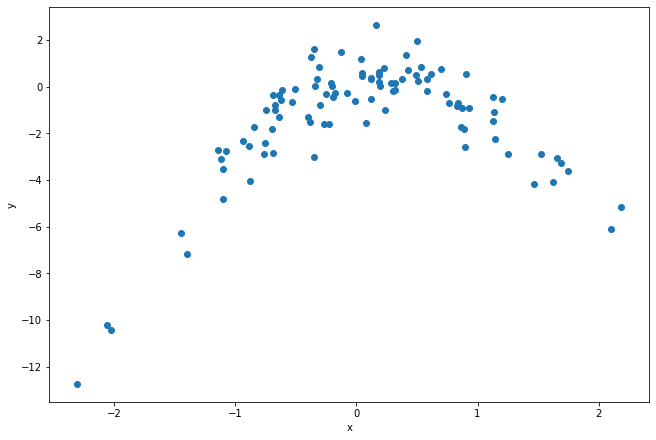

In [3]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 6))
_ = ax.scatter(x=x, y=y)
_ = ax.set_xlabel('x')
_ = ax.set_ylabel('y')

<h3>Exercise 5.8.3</h3>
<blockquote>
    <i>Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:
        <ol>
            <li>$Y = \beta_0 + \beta_1 X + \epsilon$</li>
            <li>$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$</li>
            <li>$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$</li>
            <li>$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4 + \epsilon$</li>
        </ol>
Note you may find it helpful to use the <code>data.frame()</code> function to create a single data set containing both $X$ and $Y$.</i>
</blockquote>

In [4]:
df_x = pd.DataFrame({
    'x1': x,
    'x2': x**2,
    'x3': x**3,
    'x4': x**4,
})
df_x.insert(0, 'Intercept', 1)
df_y = pd.DataFrame({'y': y})

descriptiveColumns = ['Intercept']

loocv = LeaveOneOut() # leave-one-out cross-validation

for i in range(1, 5):
    MSE = 0
    poly_degree = 'x' + str(i)
    descriptiveColumns += [poly_degree]
    for train_index, test_index in loocv.split(df_x):
        df_x_train, df_x_test = df_x[descriptiveColumns].iloc[train_index], df_x[descriptiveColumns].iloc[test_index]
        df_y_train, df_y_test = df_y.iloc[train_index], df_y.iloc[test_index]

        model = sm.OLS(df_y_train, df_x_train)
        fitted = model.fit()
        Y_pred = fitted.predict(df_x_test.to_numpy())
        MSE += (df_y_test.iloc[0, 0] - Y_pred[0])**2

    f'for the polynomial fit of degree {i}, the LOOCV estimate is {MSE / n}'
    


'for the polynomial fit of degree 1, the LOOCV estimate is 6.260764331604617'

'for the polynomial fit of degree 2, the LOOCV estimate is 0.9142897072803658'

'for the polynomial fit of degree 3, the LOOCV estimate is 0.9268768781648802'

'for the polynomial fit of degree 4, the LOOCV estimate is 0.8669116865881087'

<h3>Exercise 5.8.4</h3>
<blockquote>
    <i>Repeat 3 using another random seed, and report your results. Are your results the same as what you got in 3? Why?</i>
</blockquote>

<p>There is no randomness in the training/validation set, so performing the LOOCV with a different seed will yield the same results.</p>

<h3>Exercise 5.8.5</h3>
<blockquote>
    <i>Which of the models in 3 had the smallest LOOCV error? Is this what you expected? Explain your answer.</i>
</blockquote>

<p>The polynomial fit of degree 4 resulted in the smallest LOOCV error, which is not what I expected because the true model is a polynomial of degree 2 and so I would have expected that the fit of degree 2 would have results in the smallest LOOCV error. In fact, chaning the seed in cell 2 of this cell to <code>seed = 0</code> will result in the fit of degree 2 to have the smallest LOOCV error. This discrepancy is thus due to the statistical noise, which can be validated by increasing $n$ from $n=100$ to $n=1000$.</p>

In [5]:
seed = 1
np.random.seed(seed)
n = 1000
x = np.random.normal(size=n, loc=0, scale=1)
y = x - 2*x**2 + np.random.normal(size=n, loc=0, scale=1)

df_x = pd.DataFrame({
    'x1': x,
    'x2': x**2,
    'x3': x**3,
    'x4': x**4,
})
df_x.insert(0, 'Intercept', 1)
df_y = pd.DataFrame({'y': y})

descriptiveColumns = ['Intercept']

loocv = LeaveOneOut() # leave-one-out cross-validation

for i in range(1, 5):
    MSE = 0
    poly_degree = 'x' + str(i)
    descriptiveColumns += [poly_degree]
    for train_index, test_index in loocv.split(df_x):
        df_x_train, df_x_test = df_x[descriptiveColumns].iloc[train_index], df_x[descriptiveColumns].iloc[test_index]
        df_y_train, df_y_test = df_y.iloc[train_index], df_y.iloc[test_index]

        model = sm.OLS(df_y_train, df_x_train)
        fitted = model.fit()
        Y_pred = fitted.predict(df_x_test.to_numpy())
        MSE += (df_y_test.iloc[0, 0] - Y_pred[0])**2

    f'for the polynomial fit of degree {i}, the LOOCV estimate is {MSE / n}'

'for the polynomial fit of degree 1, the LOOCV estimate is 9.112753777466398'

'for the polynomial fit of degree 2, the LOOCV estimate is 1.063343734883582'

'for the polynomial fit of degree 3, the LOOCV estimate is 1.0654540727285113'

'for the polynomial fit of degree 4, the LOOCV estimate is 1.06445720231886'

<h3>Exercise 5.8.6</h3>
<blockquote>
    <i>Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in 3 using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?</i>
</blockquote>


In [6]:
seed = 1
np.random.seed(seed)
n = 100
x = np.random.normal(size=n, loc=0, scale=1)
y = x - 2*x**2 + np.random.normal(size=n, loc=0, scale=1)

df_x = pd.DataFrame({
    'x1': x,
    'x2': x**2,
    'x3': x**3,
    'x4': x**4,
})
df_x.insert(0, 'Intercept', 1)
df_y = pd.DataFrame({'y': y})

In [7]:
model = sm.OLS(df_y, df_x[['Intercept', 'x1']])
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     9.997
Date:                Sun, 26 Jan 2020   Prob (F-statistic):            0.00209
Time:                        14:19:28   Log-Likelihood:                -228.87
No. Observations:                 100   AIC:                             461.7
Df Residuals:                      98   BIC:                             466.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4131      0.242     -5.849      0.000      -1.893      -0.934
x1             0.8610      0.272      3.162      0.002       0.321       1.401
==============================================================================
Omnibus:                       37.310   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.521
Skew:                          -1.554   Prob(JB):                     8.01e-16
Kurtosis:                       5.651   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
model = sm.OLS(df_y, df_x[['Intercept', 'x1', 'x2']])
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     304.9
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           1.47e-42
Time:                        14:19:28   Log-Likelihood:                -134.42
No. Observations:                 100   AIC:                             274.8
Df Residuals:                      97   BIC:                             282.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1350      0.115      1.169      0.245      -0.094       0.364
x1             1.0936      0.107     10.229      0.000       0.881       1.306
x2            -1.9846      0.085    -23.331      0.000      -2.153      -1.816
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
model = sm.OLS(df_y, df_x[['Intercept', 'x1', 'x2', 'x3']])
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     204.8
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           1.40e-41
Time:                        14:19:28   Log-Likelihood:                -133.66
No. Observations:                 100   AIC:                             275.3
Df Residuals:                      96   BIC:                             285.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1280      0.115      1.111      0.269      -0.101       0.357
x1             0.9065      0.187      4.842      0.000       0.535       1.278
x2            -1.9753      0.085    -23.187      0.000      -2.144      -1.806
x3             0.0788      0.065      1.216      0.227      -0.050       0.208
==============================================================================
Omnibus:                        1.539   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.463   Jarque-Bera (JB):                1.081
Skew:                          -0.236   Prob(JB):                        0.583
Kurtosis:                       3.193   Cond. No.                         5.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model = sm.OLS(df_y, df_x[['Intercept', 'x1', 'x2', 'x3', 'x4']])
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     163.0
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           1.24e-41
Time:                        14:19:28   Log-Likelihood:                -130.63
No. Observations:                 100   AIC:                             271.3
Df Residuals:                      95   BIC:                             284.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3140      0.136      2.311      0.023       0.044       0.584
x1             0.9127      0.183      4.999      0.000       0.550       1.275
x2            -2.5445      0.248    -10.264      0.000      -3.037      -2.052
x3             0.0992      0.064      1.556      0.123      -0.027       0.226
x4             0.1394      0.057      2.437      0.017       0.026       0.253
==============================================================================
Omnibus:                        1.537   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                1.088
Skew:                          -0.238   Prob(JB):                        0.581
Kurtosis:                       3.184   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>We see that the $p$ values of $\hat{\beta_1}$ and $\hat{\beta_2}$ indicate a very strong relation, whereas the other coefficients have large $p$ values. This make sense due to the model being used to generate the data.</p>